In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
train = pd.read_csv("data/train.csv")

In [36]:
test = pd.read_csv("data/test_x.csv")

## 데이터 탐색

In [37]:
train.shape, test.shape

((45532, 78), (11383, 77))

In [38]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [39]:
test.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,1,1,0,1,1,0,1,1,1,1


In [40]:
set(train.columns) - set(test.columns)

{'voted'}

In [41]:
train["voted"]

0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [42]:
train.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [43]:
test.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_7531/4029245357.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = train.corr(), cmap ="Blues")


<AxesSubplot: >

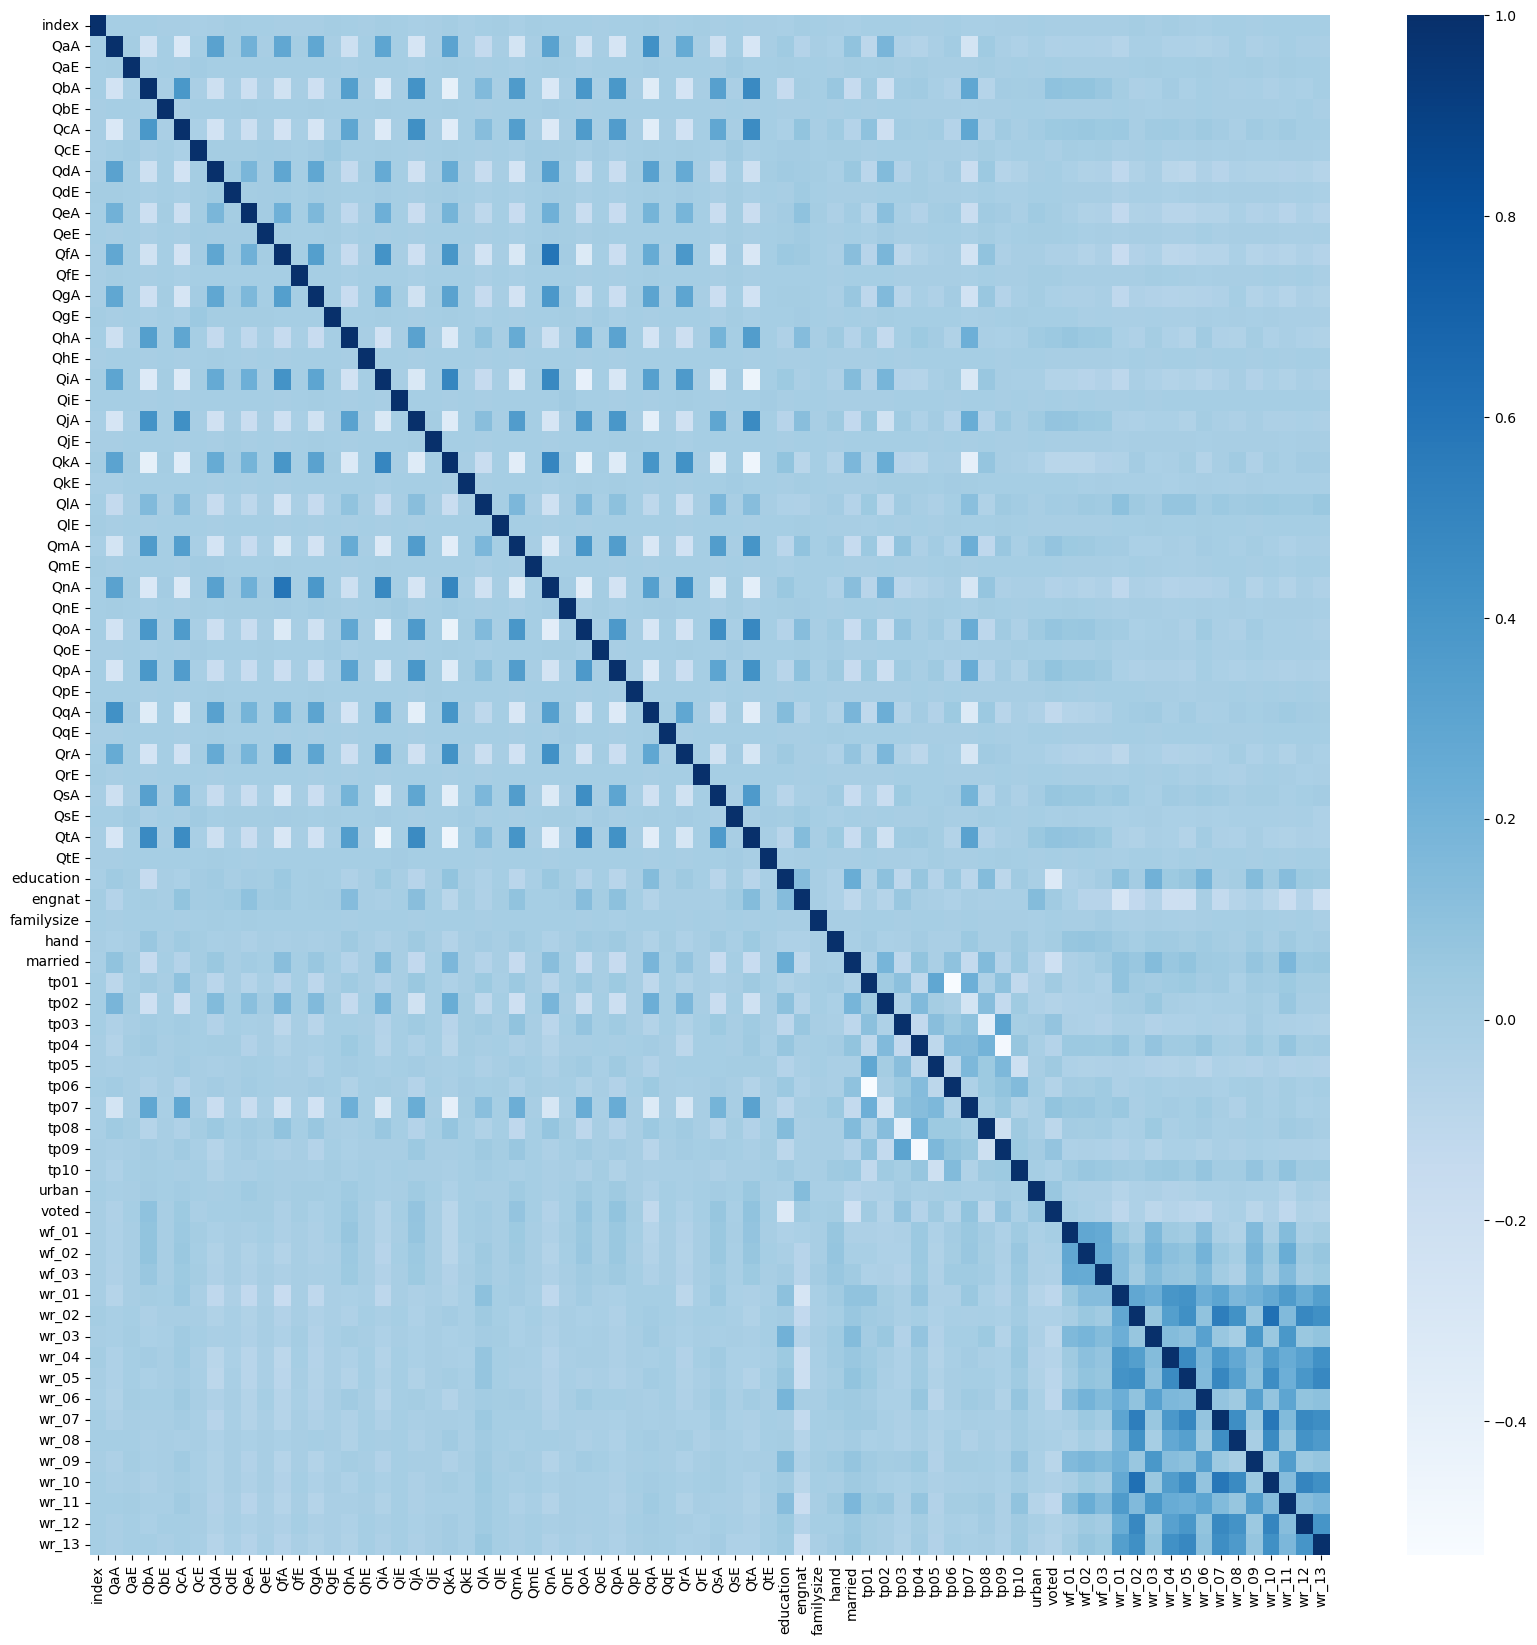

In [44]:
plt.figure(figsize = (20,20))
sns.heatmap(data = train.corr(), cmap ="Blues")

In [45]:
train["voted"] = train["voted"].map(lambda x:x-1)

## 학습 데이터 셋 분류

In [46]:
label_name = "voted"

In [47]:
train.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [48]:
X_train = train[['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']]

In [49]:
y_train = train[label_name]

In [50]:
X_test = test[['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']]

In [51]:
X_train.shape, y_train.shape, X_test.shape

((45532, 76), (45532,), (11383, 76))

In [52]:
# 데이터 타입 object 칼럼
X_train[["age_group", "gender","race","religion"]]

,age_group,gender,race,religion
0,30s,Female,White,Other
1,20s,Female,Asian,Hindu
2,30s,Male,White,Other
3,20s,Female,Asian,Hindu
4,20s,Male,White,Agnostic
...,...,...,...,...
45527,10s,Female,White,Jewish
45528,30s,Male,White,Atheist
45529,10s,Female,White,Christian_Other
45530,40s,Male,White,Atheist


## 데이터 전처리

In [53]:
X_train["age_group"] = X_train["age_group"].map(lambda x:int(x[:-1]))

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_7531/1586617358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["age_group"] = X_train["age_group"].map(lambda x:int(x[:-1]))


In [54]:
X_test["age_group"] = X_test["age_group"].map(lambda x:int(x[:-1]))

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_7531/784678811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age_group"] = X_test["age_group"].map(lambda x:int(x[:-1]))


In [55]:
X_train_ohe = pd.get_dummies(X_train)

In [56]:
X_test_ohe = pd.get_dummies(X_test)

## 딥러닝

In [57]:
# tensorflow 를 tf로 불러오기
import tensorflow as tf

In [58]:
input_shape = X_train_ohe.shape[1]
input_shape

94

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 128, input_shape=[input_shape]),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,  activation = "sigmoid"),
    tf.keras.layers.Dense(1)])
model

In [60]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['binary_crossentropy','accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               12160     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [62]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [63]:
history = model.fit(X_train_ohe, y_train, epochs = 100, validation_split=0.2, callbacks = [early_stop, PrintDot()])

Epoch 1/100
   1/1139 [..............................] - ETA: 6:13 - loss: 4.0100 - binary_crossentropy: 4.0100 - accuracy: 0.5000

2023-01-30 19:56:00.761935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1139/1139 [==============================] - ETA: 0s - loss: 1.1030 - binary_crossentropy: 1.1030 - accuracy: 0.5125

2023-01-30 19:56:11.364653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



1139/1139 [==============================] - 12s 10ms/step - loss: 1.1030 - binary_crossentropy: 1.1030 - accuracy: 0.5125 - val_loss: 0.7111 - val_binary_crossentropy: 0.7111 - val_accuracy: 0.5388
Epoch 2/100
1139/1139 [==============================] - 11s 10ms/step - loss: 0.7121 - binary_crossentropy: 0.7121 - accuracy: 0.5188 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911 - val_accuracy: 0.5454
Epoch 3/100
1139/1139 [==============================] - 11s 10ms/step - loss: 0.6925 - binary_crossentropy: 0.6925 - accuracy: 0.5392 - val_loss: 0.6890 - val_binary_crossentropy: 0.6890 - val_accuracy: 0.5453
Epoch 4/100
1139/1139 [==============================] - 11s 10ms/step - loss: 0.6948 - binary_crossentropy: 0.6948 - accuracy: 0.5347 - val_loss: 0.6934 - val_binary_crossentropy: 0.6934 - val_accuracy: 0.4547
Epoch 5/100
1139/1139 [==============================] - 11s 10ms/step - loss: 0.6974 - binary_crossentropy: 0.6974 - accuracy: 0.5330 - val_loss: 0.6904 - val_binary_

In [64]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,binary_crossentropy,accuracy,val_loss,val_binary_crossentropy,val_accuracy
8,0.691684,0.691684,0.535045,0.693977,0.693977,0.545295
9,0.692080,0.692080,0.535511,0.689330,0.689330,0.545295
10,0.691451,0.691451,0.538806,0.690091,0.690091,0.545295
11,0.691192,0.691192,0.536033,0.691875,0.691875,0.545295
12,0.691767,0.691767,0.535127,0.689133,0.689133,0.545295


<AxesSubplot: >

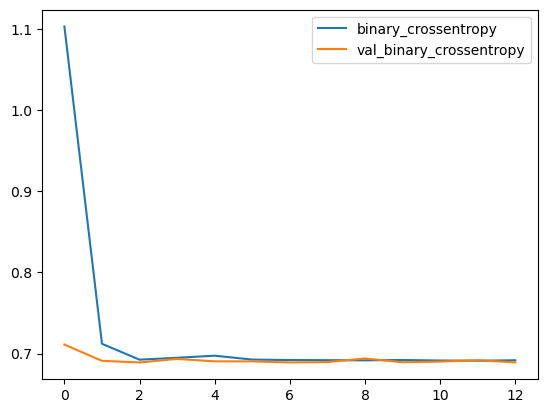

In [65]:
df_hist[["binary_crossentropy","val_binary_crossentropy"]].plot()

<AxesSubplot: >

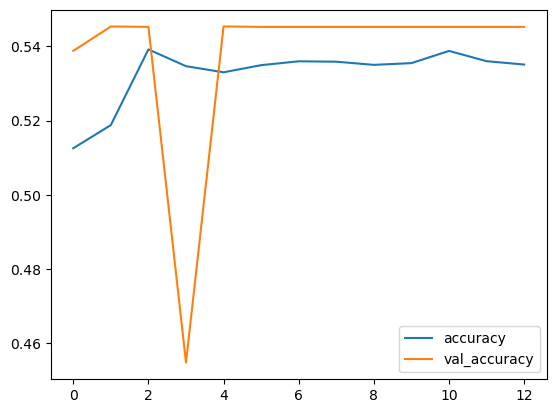

In [66]:
df_hist[["accuracy", "val_accuracy"]].plot()

## 모델 예측

In [67]:
y_pred = model.predict(X_test_ohe)

 61/356 [====>.........................] - ETA: 0s

2023-01-30 19:58:26.149664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


356/356 [==============================] - 1s 2ms/step


In [75]:
y_predict = (y_pred.flatten() > 0.5).astype(int)
y_predict.shape

(11383,)

## 모델 제출

In [71]:
submission = pd.read_csv("data/sample_submission.csv")
submission.head()

,index,voted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [72]:
submission["voted"] = y_predict

In [76]:
accuracy = float(df_hist["accuracy"][-1:])
accuracy

0.5351269841194153

In [74]:
file_name = f"{accuracy}_221204.csv"
file_name

'0.5351269841194153_221204.csv'

In [ ]:
# submission.to_csv(file_name, index = False)

In [ ]:
# pd.read_csv(file_name)

,index,voted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
11378,11378,1
11379,11379,1
11380,11380,1
11381,11381,1
